In [1]:
pip install nltk


In [2]:
pip install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [3]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn
import json
import pickle
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

In [5]:
# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Initialize lemmatizer and set of English stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [7]:
# Load data from intents.json
data_file = open('intent.json').read()
intents = json.loads(data_file)


In [8]:
# Open the JSON file
with open('intent.json', 'r') as json_file:
    # Load the data from the file
    data = json.load(json_file)

# Now you can work with the data as a Python dictionary
print(data)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hi there', 'Hello', 'Hey there', 'Howdy', 'Hola', 'Bonjour', 'Konnichiwa', 'Guten tag', 'Ola'], 'responses': ['Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're back. What's going on in your world right now?"]}, {'tag': 'morning', 'patterns': ['Good morning'], 'responses': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "]}, {'tag': 'afternoon', 'patterns': ['Good afternoon'], 'responses': ['Good afternoon. How is your day going?']}, {'tag': 'evening', 'patterns': ['Good evening'], 'responses': ['Good evening. How has your day been?']}, {'tag': 'night', 'patterns': ['Good night'], 'responses': ['Good night. Get some proper sleep', 'Good night. Sweet dreams.']}, {'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 

In [9]:
# Initialize lists for words, classes, and documents
words = []
classes = []
documents = []

In [10]:
# Define function to convert NLTK part-of-speech tags to WordNet tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return None

In [11]:
# Preprocess data
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize and preprocess each word
        tokens = word_tokenize(pattern)
        tokens = [word.lower() for word in tokens if word.isalnum()]
        tokens = [word for word in tokens if word not in stop_words]
        tags = nltk.pos_tag(tokens)  # Use nltk.pos_tag instead of pos_tag

        # Lemmatize each word, handling None values gracefully
        lemmatized_tokens = []
        for word, pos_tag in tags:
            wn_pos = get_wordnet_pos(pos_tag)
            if wn_pos is None:
                lemmatized_tokens.append(lemmatizer.lemmatize(word))
            else:
                lemmatized_tokens.append(lemmatizer.lemmatize(word, pos=wn_pos))

        # Add preprocessed words to vocabulary
        words.extend(lemmatized_tokens)

        # Add documents in the corpus
        documents.append((lemmatized_tokens, intent['tag']))

        # Add intent tag to classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Remove duplicates from words and sort
words = sorted(list(set(words)))
classes = sorted(classes)


In [12]:
# Print information about the preprocessed data
print(len(documents), "documents")
print(len(classes), "classes:", classes)
print(len(words), "unique lemmatized words:", words)

256 documents
85 classes: ['about', 'afternoon', 'anxious', 'ask', 'casual', 'creation', 'death', 'default', 'depressed', 'done', 'evening', 'fact-1', 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15', 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-2', 'fact-20', 'fact-21', 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27', 'fact-28', 'fact-29', 'fact-3', 'fact-30', 'fact-31', 'fact-32', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9', 'food', 'friends', 'goodbye', 'greeting', 'happy', 'hate-me', 'hate-you', 'help', 'jokes', 'learn-mental-health', 'learn-more', 'location', 'meditation', 'mental-health-fact', 'morning', 'movies', 'music', 'name', 'neutral-response', 'night', 'no-approach', 'no-response', 'not-talking', 'pandora-useful', 'problem', 'repeat', 'sad', 'scared', 'skill', 'sleep', 'something-else', 'stressed', 'stupid', 'suicide', 'technology', 'thanks', 'understand', 'user-advice', 'user-agree', 'user-meditation', 'weather', 'worthless', 'wr

In [13]:
# Save preprocessed data using pickle
with open('words.pkl', 'wb') as f:
    pickle.dump(words, f)

with open('classes.pkl', 'wb') as f:
    pickle.dump(classes, f)

In [14]:
with open('classes.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data)

['about', 'afternoon', 'anxious', 'ask', 'casual', 'creation', 'death', 'default', 'depressed', 'done', 'evening', 'fact-1', 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15', 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-2', 'fact-20', 'fact-21', 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27', 'fact-28', 'fact-29', 'fact-3', 'fact-30', 'fact-31', 'fact-32', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9', 'food', 'friends', 'goodbye', 'greeting', 'happy', 'hate-me', 'hate-you', 'help', 'jokes', 'learn-mental-health', 'learn-more', 'location', 'meditation', 'mental-health-fact', 'morning', 'movies', 'music', 'name', 'neutral-response', 'night', 'no-approach', 'no-response', 'not-talking', 'pandora-useful', 'problem', 'repeat', 'sad', 'scared', 'skill', 'sleep', 'something-else', 'stressed', 'stupid', 'suicide', 'technology', 'thanks', 'understand', 'user-advice', 'user-agree', 'user-meditation', 'weather', 'worthless', 'wrong']


In [15]:

with open('words.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data)

['absolutely', 'advice', 'affect', 'afternoon', 'alot', 'already', 'another', 'answer', 'anxiety', 'anxious', 'anymore', 'anyone', 'anything', 'appear', 'approach', 'artificial', 'ask', 'au', 'available', 'away', 'awful', 'become', 'bonjour', 'bore', 'boyfriend', 'break', 'bring', 'brother', 'burn', 'bye', 'ca', 'call', 'cause', 'cheerful', 'child', 'commit', 'connection', 'continue', 'control', 'could', 'crazy', 'create', 'cuisine', 'cure', 'dad', 'day', 'define', 'delicious', 'depress', 'depressed', 'depression', 'deserve', 'die', 'difference', 'different', 'disorder', 'dumb', 'eat', 'else', 'empty', 'enough', 'evening', 'exam', 'fact', 'family', 'fare', 'favorite', 'feel', 'financial', 'find', 'fine', 'focus', 'forecast', 'friend', 'gadget', 'genre', 'get', 'girlfriend', 'give', 'go', 'good', 'goodbye', 'great', 'group', 'guess', 'guten', 'hand', 'happy', 'hate', 'health', 'hello', 'help', 'helpful', 'hey', 'hi', 'hmmm', 'hola', 'howdy', 'humor', 'hungry', 'ill', 'illness', 'importa

In [16]:
training = []
output_empty = [0] * len(classes)

# Iterate through documents
for doc in documents:
    bag = [0] * len(words)  # Initialize a fixed-size bag of words

    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    # Fill the bag with 1s where words from vocabulary are present
    for idx, word in enumerate(words):
        if word in pattern_words:
            bag[idx] = 1

    # Create output row
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    # Append bag and output_row to training data
    training.append((bag, output_row))

# Shuffle the training data
random.shuffle(training)

# Split into train_x and train_y
train_x = np.array([bag for bag, _ in training])
train_y = np.array([output_row for _, output_row in training])

print("Training data created")


Training data created


In [17]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to the number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [18]:
#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1,validation_split=0.1)
#model.save('chatbot_model.h5', hist)

Epoch 1/200
46/46 [==============================] - 2s 13ms/step - loss: 4.4392 - accuracy: 0.0174 - val_loss: 4.4188 - val_accuracy: 0.0385
Epoch 2/200
46/46 [==============================] - 0s 5ms/step - loss: 4.3746 - accuracy: 0.0478 - val_loss: 4.3945 - val_accuracy: 0.0385
Epoch 3/200
46/46 [==============================] - 0s 6ms/step - loss: 4.3244 - accuracy: 0.0435 - val_loss: 4.3756 - val_accuracy: 0.0385
Epoch 4/200
46/46 [==============================] - 0s 7ms/step - loss: 4.2555 - accuracy: 0.0478 - val_loss: 4.3937 - val_accuracy: 0.0385
Epoch 5/200
46/46 [==============================] - 0s 10ms/step - loss: 4.1920 - accuracy: 0.0435 - val_loss: 4.3941 - val_accuracy: 0.0385
Epoch 6/200
46/46 [==============================] - 0s 9ms/step - loss: 4.1333 - accuracy: 0.0609 - val_loss: 4.3791 - val_accuracy: 0.0385
Epoch 7/200
46/46 [==============================] - 0s 5ms/step - loss: 4.1127 - accuracy: 0.0696 - val_loss: 4.3639 - val_accuracy: 0.0385
Epoch 8/200

In [19]:
train_loss, train_acc = model.evaluate(train_x, train_y)
print("Train Accuracy:", train_acc)

8/8 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.8789
Train Accuracy: 0.87890625


In [21]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)


In [22]:
#fitting and saving the model
hist = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1,validation_split=0.1)
#model.save('chatbot_model.h5', hist)

Epoch 1/200
37/37 [==============================] - 1s 6ms/step - loss: 1.1996 - accuracy: 0.7268 - val_loss: 0.1257 - val_accuracy: 0.9524
Epoch 2/200
37/37 [==============================] - 0s 5ms/step - loss: 0.9179 - accuracy: 0.7760 - val_loss: 0.1587 - val_accuracy: 0.9048
Epoch 3/200
37/37 [==============================] - 0s 4ms/step - loss: 0.8521 - accuracy: 0.8087 - val_loss: 0.2094 - val_accuracy: 0.9048
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 0.8189 - accuracy: 0.7923 - val_loss: 0.1835 - val_accuracy: 0.9048
Epoch 5/200
37/37 [==============================] - 0s 4ms/step - loss: 0.8107 - accuracy: 0.7760 - val_loss: 0.1935 - val_accuracy: 0.9048
Epoch 6/200
37/37 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.7978 - val_loss: 0.1965 - val_accuracy: 0.9048
Epoch 7/200
37/37 [==============================] - 0s 5ms/step - loss: 0.7920 - accuracy: 0.7650 - val_loss: 0.1662 - val_accuracy: 0.9048
Epoch 8/200
3

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

2/2 [==============================] - 0s 12ms/step - loss: 2.1202 - accuracy: 0.7692
Test Accuracy: 0.7692307829856873


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the testing set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

2/2 [==============================] - 0s 5ms/step
Accuracy: 0.7692
Precision: 0.8558
Recall: 0.7692
F1 Score: 0.7962
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


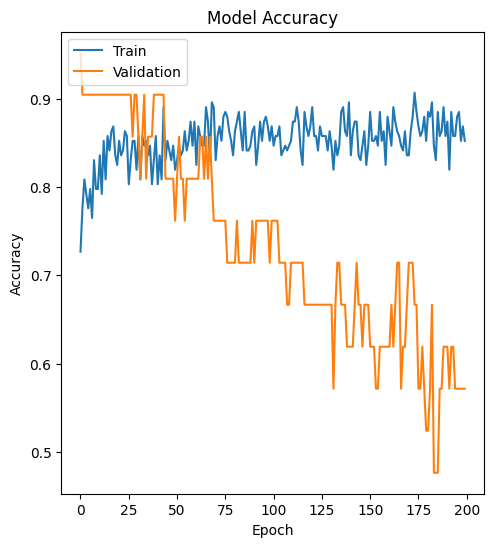

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

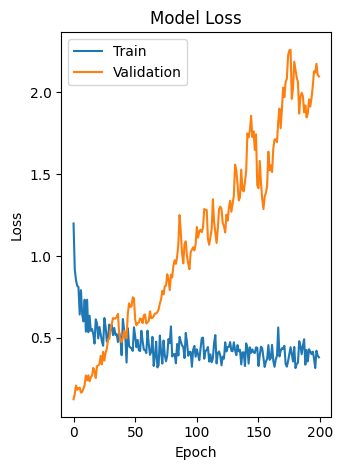

In [26]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

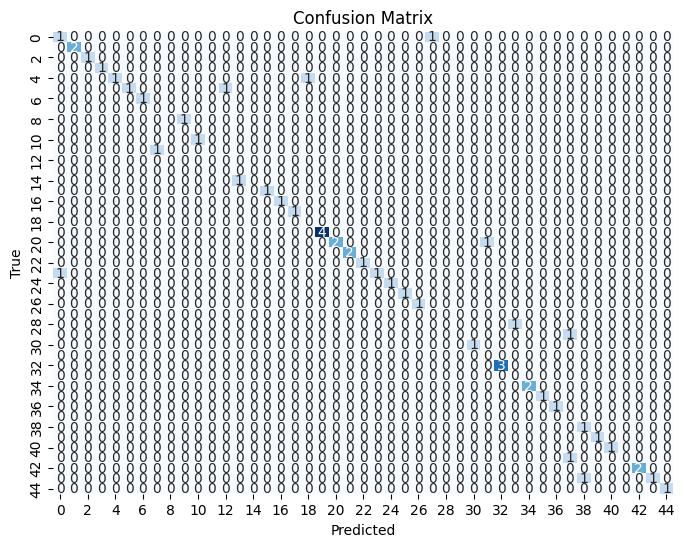

In [27]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

# Define a new model
model = Sequential()
model.add(Dense(256, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile the model with Adam optimizer
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [29]:
# Train the new model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1, validation_split=0.1)

Epoch 1/200
46/46 [==============================] - 1s 7ms/step - loss: 4.4436 - accuracy: 0.0217 - val_loss: 4.4310 - val_accuracy: 0.0385
Epoch 2/200
46/46 [==============================] - 0s 3ms/step - loss: 4.3214 - accuracy: 0.0783 - val_loss: 4.4046 - val_accuracy: 0.0385
Epoch 3/200
46/46 [==============================] - 0s 3ms/step - loss: 4.1621 - accuracy: 0.0565 - val_loss: 4.4017 - val_accuracy: 0.0385
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 3.9616 - accuracy: 0.1000 - val_loss: 4.4433 - val_accuracy: 0.0385
Epoch 5/200
46/46 [==============================] - 0s 3ms/step - loss: 3.8137 - accuracy: 0.1087 - val_loss: 4.4479 - val_accuracy: 0.0385
Epoch 6/200
46/46 [==============================] - 0s 3ms/step - loss: 3.6074 - accuracy: 0.1478 - val_loss: 4.4178 - val_accuracy: 0.0769
Epoch 7/200
46/46 [==============================] - 0s 3ms/step - loss: 3.3874 - accuracy: 0.2261 - val_loss: 4.3728 - val_accuracy: 0.1538
Epoch 8/200
4

In [30]:
train_loss, train_acc = model.evaluate(train_x, train_y)
print("Train Accuracy:", train_acc)


8/8 [==============================] - 0s 3ms/step - loss: 0.8871 - accuracy: 0.8828
Train Accuracy: 0.8828125


In [31]:
# Train the new model
hist = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1, validation_split=0.1)

Epoch 1/200
37/37 [==============================] - 1s 5ms/step - loss: 1.0072 - accuracy: 0.8361 - val_loss: 0.1257 - val_accuracy: 0.9048
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.8798 - val_loss: 0.1374 - val_accuracy: 0.9048
Epoch 3/200
37/37 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.9071 - val_loss: 0.1454 - val_accuracy: 0.9048
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 0.4686 - accuracy: 0.8907 - val_loss: 0.1468 - val_accuracy: 0.9048
Epoch 5/200
37/37 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.8962 - val_loss: 0.1587 - val_accuracy: 0.9048
Epoch 6/200
37/37 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.9180 - val_loss: 0.1575 - val_accuracy: 0.9048
Epoch 7/200
37/37 [==============================] - 0s 4ms/step - loss: 0.3680 - accuracy: 0.8962 - val_loss: 0.1591 - val_accuracy: 0.9048
Epoch 8/200
3

In [33]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

2/2 [==============================] - 0s 14ms/step - loss: 2.2767 - accuracy: 0.8462
Test Accuracy: 0.8461538553237915


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the testing set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

2/2 [==============================] - 0s 6ms/step
Accuracy: 0.8462
Precision: 0.9327
Recall: 0.8462
F1 Score: 0.8731
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


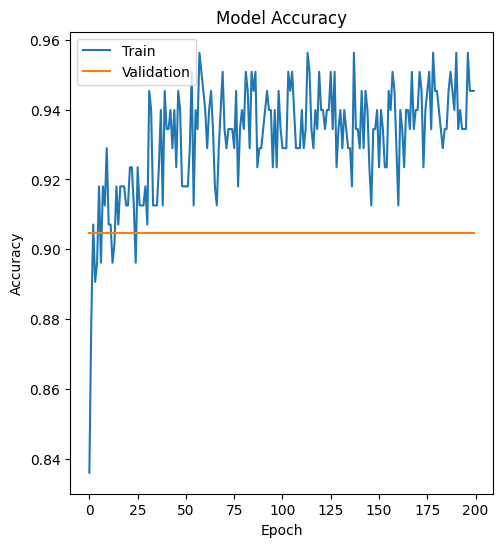

In [38]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

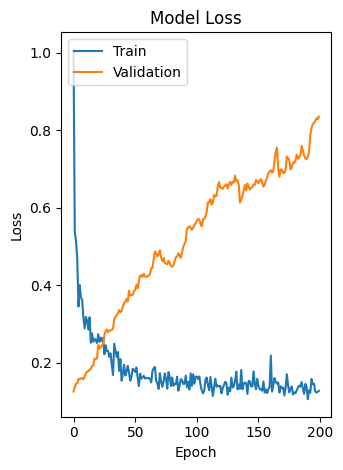

In [39]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

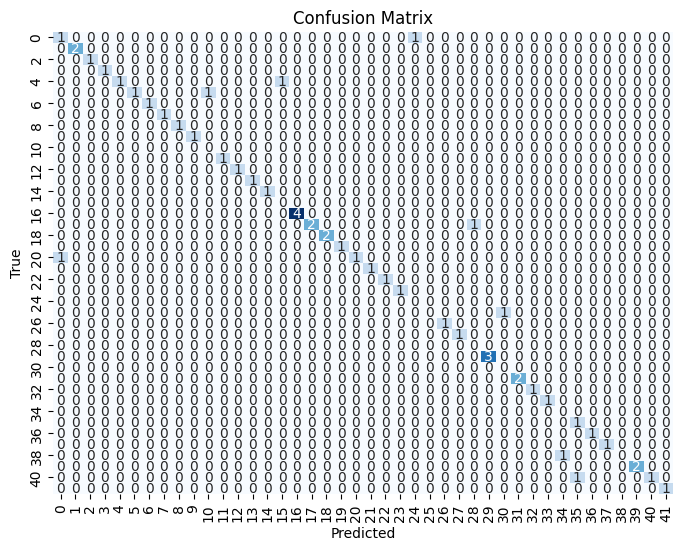

In [40]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [41]:
model.save('chatbot_model.h5', hist)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
from keras.models import load_model
model = load_model('chatbot_model.h5')
import time
# Function to replace words with their synonyms or related words from WordNet
def get_synonyms(word):
    synonyms = []
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Modify the clean_up_sentence function to include WordNet-based word replacement
def clean_up_sentence(sentence):
    # Tokenize the pattern - split words into an array
    sentence_words = nltk.word_tokenize(sentence)
    # Replace each word with its synonyms from WordNet
    replaced_words = [get_synonyms(word) if word not in stop_words else [word] for word in sentence_words]
    # Flatten the list of replaced words
    replaced_words = [word for sublist in replaced_words for word in sublist]
    # Lemmatize each word - create short form for word
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in replaced_words]
    return lemmatized_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

# Update the predict_class function to use the modified clean_up_sentence function
def predict_class(sentence, model):
    # Filter out predictions below a threshold
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # Sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

# Update the chatbot_response function to handle the expanded vocabulary
def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res


#Creating GUI with tkinter
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))

        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Hello")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()

TclError: no display name and no $DISPLAY environment variable